<a href="https://colab.research.google.com/github/yusufhabibu/Nigeria-Flaring-Data-1960-2022/blob/main/Nigeria_gas_flare_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [3]:
#Mount data from drive to see data
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import pandas as pd

# Load the Gas Lift data
Nigeria_Flaring_data = pd.read_excel('/content/Nigeria Flaring data.xlsx')

#print out first 5 rows
Nigeria_Flaring_data.head(5)

,Year,Gas flared(100 Million cubic meters),Gas Produced(100 Million cubic meters),Oil production (100 Million Barrels),AVERAGE Crude price($) (BARREL),Cost (USD per 100 Billion cubic meters),No. of active Rigs,Gas Flare penalty ($ per 1000 cubic meter)
0,1958,0.00,0.46,1.876000,1.10,1.054000,3,7.857143
1,1959,0.00,1.40,4.234334,1.40,1.110916,7,7.857143
2,1960,1.43,1.44,11.803896,1.45,1.180904,7,7.857143
3,1961,3.00,3.10,16.801896,1.57,1.243492,5,7.857143
4,1962,4.67,4.86,24.623691,1.52,1.209917,6,7.857143


### Data Cleaning

In [5]:
# Check if the columns have the right data types
dtypes = Nigeria_Flaring_data.dtypes
print(dtypes)

Year                                            int64
Gas flared(100 Million cubic meters)          float64
Gas Produced(100 Million cubic meters)        float64
Oil production (100 Million Barrels)          float64
AVERAGE Crude price($) (BARREL)               float64
Cost (USD per 100 Billion cubic meters)       float64
No. of active Rigs                              int64
Gas Flare penalty ($ per 1000 cubic meter)    float64
dtype: object


In [6]:
# Get shape of the data
print(Nigeria_Flaring_data.shape)

(65, 8)


In [7]:
#check for missing values
missing_values_count = Nigeria_Flaring_data.isnull().sum()
print(missing_values_count)

Year                                          0
Gas flared(100 Million cubic meters)          0
Gas Produced(100 Million cubic meters)        0
Oil production (100 Million Barrels)          0
AVERAGE Crude price($) (BARREL)               0
Cost (USD per 100 Billion cubic meters)       0
No. of active Rigs                            0
Gas Flare penalty ($ per 1000 cubic meter)    0
dtype: int64


### Exploratory Data Analysis

In [8]:
# Check the overall statistics.
Nigeria_Flaring_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,65.0,1990.000000,18.907670,1958.000000,1974.000000,1990.000000,2006.000000,2022.000000
Gas flared(100 Million cubic meters),65.0,149.541711,91.412236,0.000000,75.388800,164.681800,236.320000,285.843900
Gas Produced(100 Million cubic meters),65.0,326.310581,237.542054,0.460000,162.510000,284.300000,508.100000,847.073400
Oil production (100 Million Barrels),65.0,584.672986,278.919435,1.876000,490.440000,681.894600,776.668000,918.660619
AVERAGE Crude price($) (BARREL),65.0,31.001077,31.014701,1.100000,10.430000,18.860000,44.020000,109.450000
Cost (USD per 100 Billion cubic meters),65.0,292.756646,322.758746,1.054000,3.201438,46.109326,675.321101,954.554485
No. of active Rigs,65.0,13.984615,11.922264,3.000000,7.000000,11.000000,15.000000,59.000000
Gas Flare penalty ($ per 1000 cubic meter),65.0,33.131868,45.167796,1.071429,7.857143,7.857143,16.428571,125.000000


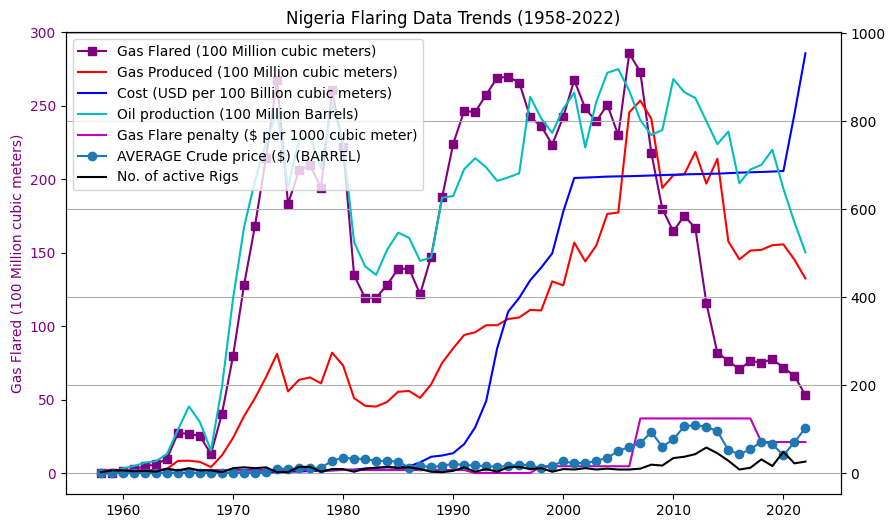

In [9]:
import matplotlib.pyplot as plt

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Gas flared on the primary y-axis
ax1.plot(Nigeria_Flaring_data['Year'], Nigeria_Flaring_data['Gas flared(100 Million cubic meters)'], 's-', color='purple', label='Gas Flared (100 Million cubic meters)') # Purple line with square markers
ax1.set_ylabel('Gas Flared (100 Million cubic meters)', color='purple')
ax1.tick_params('y', labelcolor='purple')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot Gas Produced and Oil Production on the secondary y-axis
ax2.plot(Nigeria_Flaring_data['Year'], Nigeria_Flaring_data['Gas Produced(100 Million cubic meters)'], 'r-', label='Gas Produced (100 Million cubic meters)')
ax2.plot(Nigeria_Flaring_data['Year'], Nigeria_Flaring_data['Cost (USD per 100 Billion cubic meters)'], 'b-', label='Cost (USD per 100 Billion cubic meters)')
ax2.plot(Nigeria_Flaring_data['Year'], Nigeria_Flaring_data['Oil production (100 Million Barrels)'], 'c-', label='Oil production (100 Million Barrels)') # Cyan
ax2.plot(Nigeria_Flaring_data['Year'], Nigeria_Flaring_data['Gas Flare penalty ($ per 1000 cubic meter)'], 'm-', label='Gas Flare penalty ($ per 1000 cubic meter)') # Magenta
ax2.plot(Nigeria_Flaring_data['Year'], Nigeria_Flaring_data['AVERAGE Crude price($) (BARREL)'], 'o-', label='AVERAGE Crude price ($) (BARREL)') # Orange with circle markers
ax2.plot(Nigeria_Flaring_data['Year'], Nigeria_Flaring_data['No. of active Rigs'], 'k-', label='No. of active Rigs') # Black


# Add legend and title
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.title('Nigeria Flaring Data Trends (1958-2022)')

# Show the plot
plt.grid(True)
plt.show()

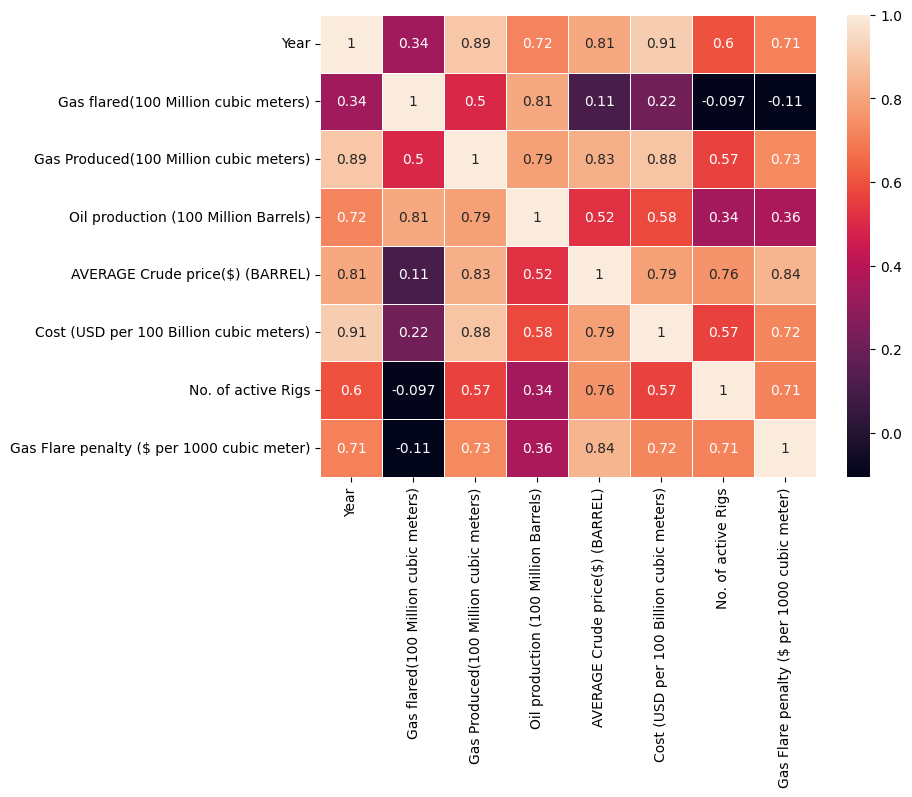

In [10]:
import seaborn as sns

# calculate the correlation matrix for the DataFrame.
corr_matrix = Nigeria_Flaring_data.corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

# Builidng the Machine Learning Model

In [11]:
#import library
from sklearn.model_selection import train_test_split

In [12]:
# Assign features and labels

features = ['Year',	'Gas Produced(100 Million cubic meters)','Oil production (100 Million Barrels)','Cost (USD per 100 Billion cubic meters)', 'Gas Flare penalty ($ per 1000 cubic meter)', 'No. of active Rigs', 'AVERAGE Crude price($) (BARREL)'	 ]

labels = ['Gas flared(100 Million cubic meters)']

In [13]:
# Assign input and output data
input_data = Nigeria_Flaring_data[features]

output_data = Nigeria_Flaring_data[labels]

In [14]:
# Split data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.3, random_state=42)


print("Input training data shape:", X_train.shape)

print("Input test data shape:", X_test.shape)
print("")
print("Output training data shape:", y_train.shape)
print("Output test data shape:", y_test.shape)

Input training data shape: (45, 7)
Input test data shape: (20, 7)

Output training data shape: (45, 1)
Output test data shape: (20, 1)


## Linear Regression

In [15]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns  # For more visually appealing plots

In [16]:
# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("\nLinear Regression Model Trained!")
# Access the first element of the coef_ array to print as a single float

# Get the feature names from your input data
feature_names = X_train.columns

# Get the coefficients from the trained model
coefficients = model.coef_[0]

# Print the coefficients for each feature
print("Coefficients for each feature:")
for i, feature in enumerate(feature_names):
    print(f"{feature}: {coefficients[i]:.2f}")

print(f"Intercept: {model.intercept_[0]:.2f}")


Linear Regression Model Trained!
Coefficients for each feature:
Year: -0.53
Gas Produced(100 Million cubic meters): 0.38
Oil production (100 Million Barrels): 0.21
Cost (USD per 100 Billion cubic meters): -0.10
Gas Flare penalty ($ per 1000 cubic meter): -0.88
No. of active Rigs: -1.07
AVERAGE Crude price($) (BARREL): -0.67
Intercept: 1053.91


In [17]:
# Get coefficients
# how strongly a feature influences the prediction, regardless of direction.
feature_importance = pd.Series(np.abs(model.coef_[0]), index=X_train.columns).sort_values(ascending=False)
print("Feature Importance (Linear Model):")
print(feature_importance)

Feature Importance (Linear Model):
No. of active Rigs                            1.070367
Gas Flare penalty ($ per 1000 cubic meter)    0.878018
AVERAGE Crude price($) (BARREL)               0.673601
Year                                          0.529961
Gas Produced(100 Million cubic meters)        0.378993
Oil production (100 Million Barrels)          0.210801
Cost (USD per 100 Billion cubic meters)       0.104689
dtype: float64


## Model Evaluation

Check if its overfitting

In [18]:
# Get the R-squared score for the training data
train_r2 = model.score(X_train, y_train)
print(f"R-squared on training data: {train_r2:.2f}")

# Get the R-squared score for the testing data
test_r2 = model.score(X_test, y_test)
print(f"R-squared on testing data: {test_r2:.2f}")

# Define a tolerance for checking if the scores are close
# You might need to adjust this value based on your specific problem
tolerance = 0.05

# Check if the difference between R-squared scores is within the tolerance
if abs(train_r2 - test_r2) <= tolerance:
    print("The model is not significantly overfitting and is ready to use.")
else:
    print("There might be some overfitting or underfitting. Consider further model tuning or data analysis.")


R-squared on training data: 0.92
R-squared on testing data: 0.92
The model is not significantly overfitting and is ready to use.


In [19]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

#present prediction in a table
df = pd.DataFrame({'Actual': y_test.values.ravel(), 'Predicted': y_pred.ravel()})
print(df)


        Actual   Predicted
0   175.289775  134.430112
1    75.388800  107.254098
2     0.000000    5.854780
3   239.430300  253.072191
4     6.000000    9.534577
5    77.596600  138.190507
6   267.760000  266.440890
7    79.570000  103.144480
8    53.183700   -5.196875
9   147.400000  155.728565
10  246.600000  222.241397
11   25.320000   30.601594
12  223.620000  240.183714
13  127.900000  153.182920
14  245.750000  242.195808
15  119.480000  113.910622
16    3.000000    5.934661
17  183.330000  197.728012
18  236.320000  220.910511
19   26.920000   34.359691


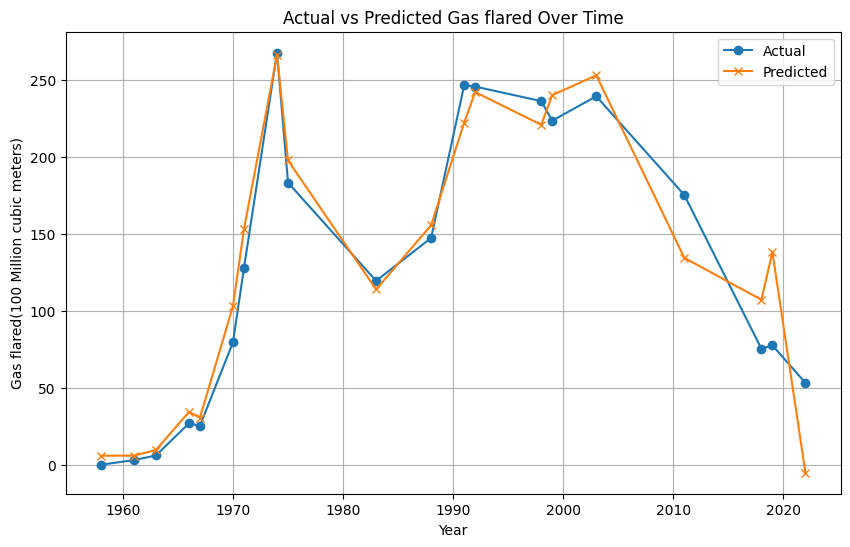

In [20]:
# plot actual vs predicted gas flared

import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have your predictions in 'y_pred' and actual values in 'y_test'
# and your testing data in X_test which includes the 'Year' column

# Create a DataFrame for plotting
plot_df = pd.DataFrame({'Year': X_test['Year'], 'Actual': y_test.values.ravel(), 'Predicted': y_pred.ravel()})

# Sort the DataFrame by Year (if it's not already sorted)
plot_df = plot_df.sort_values(by=['Year'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(plot_df['Year'], plot_df['Actual'], label='Actual', marker='o')
plt.plot(plot_df['Year'], plot_df['Predicted'], label='Predicted', marker='x')
plt.xlabel('Year')
plt.ylabel('Gas flared(100 Million cubic meters)')
plt.title('Actual vs Predicted Gas flared Over Time')
plt.legend()
plt.grid(True)
plt.show()

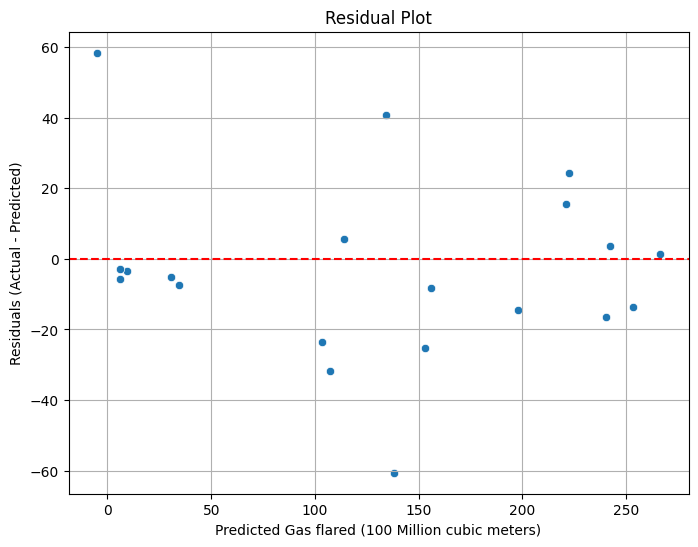

In [21]:
#plot residual plot

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test contains the actual values and y_pred contains the predicted values
residuals = y_test.values.ravel() - y_pred.ravel() # Calculate residuals

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred.ravel(), y=residuals)  # Use ravel() to flatten arrays
plt.xlabel("Predicted Gas flared (100 Million cubic meters)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

<ipython-input-22-2010327042>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True)  # Use kdeplot for density plot with shading


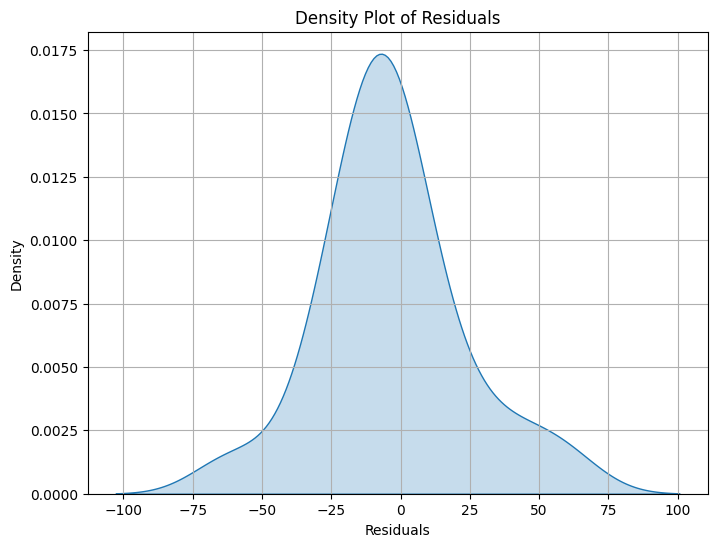

Mean: -3.49
Standard Deviation: 24.97
95% Confidence Interval: (np.float64(-15.177452943827813), np.float64(8.193144930347078))


In [22]:
#plot Density Plot of Residuals to show distribution of the residuals

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Assuming you have your actual values in 'y_test' and predictions in 'y_pred'
residuals = y_test.values.ravel() - y_pred.ravel()  # Calculate residuals

# Create the density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, shade=True)  # Use kdeplot for density plot with shading
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Density Plot of Residuals")
plt.grid(True)
plt.show()

# Calculate mean, standard deviation, and confidence interval
mean = np.mean(residuals)
std_dev = np.std(residuals)
confidence_interval = stats.t.interval(0.95, len(residuals) - 1, loc=mean, scale=std_dev / np.sqrt(len(residuals)))

# Print the values
print(f"Mean: {mean:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"95% Confidence Interval: {confidence_interval}")


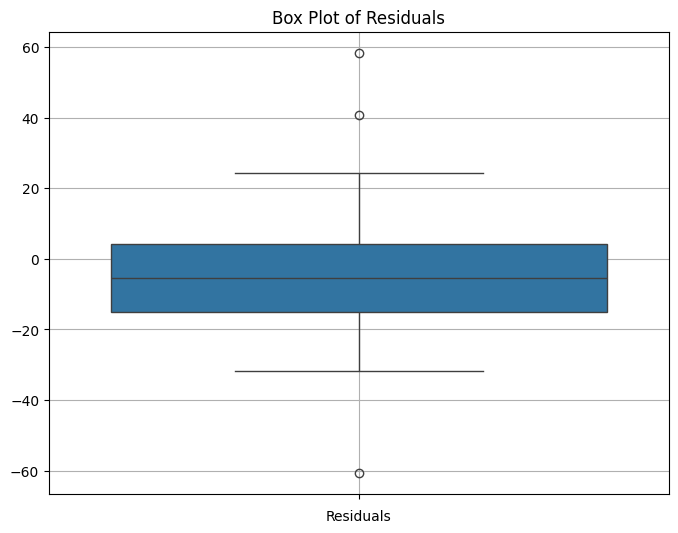

Minimum: -60.59
Q1: -14.94
Median: -5.57
Q3: 4.06
Maximum: 58.38
Semi_interquatile_range: 9.50


In [23]:
# plot Box Plot to show Error Distribution Plot

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have your actual values in 'y_test' and predictions in 'y_pred'
residuals = y_test.values.ravel() - y_pred.ravel()  # Calculate residuals

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(residuals)
plt.xlabel("Residuals")
plt.title("Box Plot of Residuals")
plt.grid(True)
plt.show()

# Calculate min, Q1, median, Q3, and max
minimum = np.min(residuals)
q1 = np.percentile(residuals, 25)
median_val = np.median(residuals)
q3 = np.percentile(residuals, 75)
maximum = np.max(residuals)
Semi_interquatile_range = (q3 - q1) / 2


# Print the values
print(f"Minimum: {minimum:.2f}")
print(f"Q1: {q1:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Q3: {q3:.2f}")
print(f"Maximum: {maximum:.2f}")
print(f"Semi_interquatile_range: {Semi_interquatile_range:.2f}")

In [24]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Calculate the Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test - y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate the R-squared
r2 = model.score(X_test, y_test)

print(f"R-squared: {r2:.2f}")



Mean Squared Error (MSE): 635.59
Root Mean Squared Error (RMSE): 25.21
Mean Absolute Error (MAE): 18.44
R-squared: 0.92


## Model Forcast

**Scenarios**

In [25]:
import pandas as pd
import numpy as np # Import numpy for power function

# Get the last historical year and the values for 'Gas Produced' and 'Oil Production' in that year
last_historical_year = Nigeria_Flaring_data['Year'].max()
last_year_data = Nigeria_Flaring_data[Nigeria_Flaring_data['Year'] == last_historical_year]

# Get the values for the last historical year. Use .iloc[0] to get the first (and only) row.
initial_gas_produced = last_year_data['Gas Produced(100 Million cubic meters)'].iloc[0]
initial_oil_production = last_year_data['Oil production (100 Million Barrels)'].iloc[0]
initial_cost = last_year_data['Cost (USD per 100 Billion cubic meters)'].iloc[0]
initial_penalty = last_year_data['Gas Flare penalty ($ per 1000 cubic meter)'].iloc[0]
initial_active_Rigs = last_year_data['No. of active Rigs'].iloc[0] # Changed variable name
initial_Crude_price = last_year_data['AVERAGE Crude price($) (BARREL)'].iloc[0] # Changed variable name

# Define the forecast horizon
forecast_start_year = last_historical_year + 1
forecast_end_year = 2033
future_years = range(forecast_start_year, forecast_end_year + 1)

In [26]:
# Define the assumed annual growth rates

#Senerior 1
gas_produced_growth_rate = 0.065  # 5% annual increase
oil_production_growth_rate = 0.04  # 2% annual increase
cost_growth_rate = 0.02  # 2% annual increase
penalty_growth_rate = 0 # 2% annual increase
active_Rigs_growth_rate = 0.01 # 1% annual increase
Crude_price_growth_rate = 0.01 # 1% annual increase

#Senerior 2
gas_produced_growth_rate2 = 0.065  # 5% annual increase
oil_production_growth_rate2 = 0.04  # 2% annual increase
cost_growth_rate2 = 0.12  # 2% annual increase
penalty_growth_rate2 = 0 # 2% annual increase
active_Rigs_growth_rate2 = 0.02 # 1% annual increase
Crude_price_growth_rate2 = 0.01 # 1% annual increase


#Senerior 3
gas_produced_growth_rate3 = 0.065  # 5% annual increase
oil_production_growth_rate3 = 0.05  # 2% annual increase
cost_growth_rate3 = 0.12  # 2% annual increase
penalty_growth_rate3 = 0 # 2% annual increase
active_Rigs_growth_rate3 = 0.02 # 1% annual increase
Crude_price_growth_rate3 = 0.2 # 1% annual increase


In [27]:
#create a list to keep projected values

# Project future values based on the growth rates(Senerio 1)
projected_gas_produced_list = []
projected_oil_production_list = []
projected_cost_list = []
projected_penalty_list = []
projected_active_Rigs_list = []
projected_Crude_price_list = []

# Project future values based on the growth rates (Senerio 2)
projected_gas_produced_list2 = []
projected_oil_production_list2 = []
projected_cost_list2 = []
projected_penalty_list2 = []
projected_active_Rigs_list2 = []
projected_Crude_price_list2 = []

# Project future values based on the growth rates (Senerio 3)
projected_gas_produced_list3 = []
projected_oil_production_list3 = []
projected_cost_list3 = []
projected_penalty_list3 = []
projected_active_Rigs_list3 = []
projected_Crude_price_list3 = []

In [28]:
#Senerio 1 projection

for year in future_years:
    # Calculate the number of years since the last historical year
    years_since_last = year - last_historical_year

    # Project future values using compound growth formula
    current_projected_gas = initial_gas_produced * (1 + gas_produced_growth_rate)**years_since_last
    current_projected_oil = initial_oil_production * (1 + oil_production_growth_rate)**years_since_last
    current_projected_cost = initial_cost * (1 + cost_growth_rate)**years_since_last
    current_projected_penalty = initial_penalty * (1 + penalty_growth_rate)**years_since_last
    current_projected_active_Rigs = initial_active_Rigs * (1 + active_Rigs_growth_rate)**years_since_last
    current_projected_Crude_price = initial_Crude_price * (1 + Crude_price_growth_rate)**years_since_last

    # Append the projected values to the lists
    projected_gas_produced_list.append(current_projected_gas)
    projected_oil_production_list.append(current_projected_oil)
    projected_cost_list.append(current_projected_cost)
    projected_penalty_list.append(current_projected_penalty)
    projected_active_Rigs_list.append(current_projected_active_Rigs)
    projected_Crude_price_list.append(current_projected_Crude_price)

In [29]:
#senerio 2 Projection
for year in future_years:
    # Calculate the number of years since the last historical year
    years_since_last = year - last_historical_year
    # Project future values using compound growth formula
    current_projected_gas2 = initial_gas_produced * (1 + gas_produced_growth_rate2)**years_since_last
    current_projected_oil2 = initial_oil_production * (1 + oil_production_growth_rate2)**years_since_last
    current_projected_cost2 = initial_cost * (1 + cost_growth_rate2)**years_since_last
    current_projected_penalty2 = initial_penalty * (1 + penalty_growth_rate2)**years_since_last
    current_projected_active_Rigs2 = initial_active_Rigs * (1 + active_Rigs_growth_rate2)**years_since_last
    current_projected_Crude_price2 = initial_Crude_price * (1 + Crude_price_growth_rate2)**years_since_last

    # Append the projected values to the lists
    projected_gas_produced_list2.append(current_projected_gas2)
    projected_oil_production_list2.append(current_projected_oil2)
    projected_cost_list2.append(current_projected_cost2)
    projected_penalty_list2.append(current_projected_penalty2)
    projected_active_Rigs_list2.append(current_projected_active_Rigs2)
    projected_Crude_price_list2.append(current_projected_Crude_price2)

In [30]:
#senerio 3 Projection
for year in future_years:
    # Calculate the number of years since the last historical year
    years_since_last = year - last_historical_year

    # Project future values using compound growth formula
    current_projected_gas3 = initial_gas_produced * (1 + gas_produced_growth_rate3)**years_since_last
    current_projected_oil3 = initial_oil_production * (1 + oil_production_growth_rate3)**years_since_last
    current_projected_cost3 = initial_cost * (1 + cost_growth_rate3)**years_since_last
    current_projected_penalty3 = initial_penalty * (1 + penalty_growth_rate3)**years_since_last
    current_projected_active_Rigs3 = initial_active_Rigs * (1 + active_Rigs_growth_rate3)**years_since_last
    current_projected_Crude_price3 = initial_Crude_price * (1 + Crude_price_growth_rate3)**years_since_last

    # Append the projected values to the lists
    projected_gas_produced_list3.append(current_projected_gas3)
    projected_oil_production_list3.append(current_projected_oil3)
    projected_cost_list3.append(current_projected_cost3)
    projected_penalty_list3.append(current_projected_penalty3)
    projected_active_Rigs_list3.append(current_projected_active_Rigs3)
    projected_Crude_price_list3.append(current_projected_Crude_price3)

In [31]:
# Create a DataFrame with future features
future_features1 = pd.DataFrame({
    'Year': future_years,
    'Gas Produced(100 Million cubic meters)': projected_gas_produced_list,
    'Oil production (100 Million Barrels)': projected_oil_production_list,
    'Cost (USD per 100 Billion cubic meters)': projected_cost_list,
    'Gas Flare penalty ($ per 1000 cubic meter)': projected_penalty_list, # Added a comma here
    'No. of active Rigs': projected_active_Rigs_list,
    'AVERAGE Crude price($) (BARREL)': projected_Crude_price_list
})

future_features2 = pd.DataFrame({
    'Year': future_years,
    'Gas Produced(100 Million cubic meters)': projected_gas_produced_list2,
    'Oil production (100 Million Barrels)': projected_oil_production_list2,
    'Cost (USD per 100 Billion cubic meters)': projected_cost_list2,
    'Gas Flare penalty ($ per 1000 cubic meter)': projected_penalty_list2, # Added a comma here
    'No. of active Rigs': projected_active_Rigs_list2,
    'AVERAGE Crude price($) (BARREL)': projected_Crude_price_list2
})

future_features3 = pd.DataFrame({
    'Year': future_years,
    'Gas Produced(100 Million cubic meters)': projected_gas_produced_list3,
    'Oil production (100 Million Barrels)': projected_oil_production_list3,
    'Cost (USD per 100 Billion cubic meters)': projected_cost_list3,
    'Gas Flare penalty ($ per 1000 cubic meter)': projected_penalty_list3, # Added a comma here
    'No. of active Rigs': projected_active_Rigs_list3,
    'AVERAGE Crude price($) (BARREL)': projected_Crude_price_list3
})

In [32]:
# Make predictions using the trained linear regression model
forecasted_flared_gas = model.predict(future_features1)
forecasted_flared_gas2 = model.predict(future_features2)
forecasted_flared_gas3 = model.predict(future_features3)

In [33]:
# Present the forecast in a DataFrame
forecast_df = pd.DataFrame({
    'Year': future_years,
    'Forecasted Gas Flared (100 Million cubic meters)': forecasted_flared_gas.flatten() # Flatten the predictions if they are in a 2D array
})

forecast_df2 = pd.DataFrame({
    'Year': future_years,
    'Forecasted Gas Flared (100 Million cubic meters)': forecasted_flared_gas2.flatten() # Flatten the predictions if they are in a 2D array
})


forecast_df3 = pd.DataFrame({
    'Year': future_years,
     #'Projected Gas Produced (100 Million cubic meters)': projected_gas_produced,
    #'Projected Oil Production (100 Million Barrels)': projected_oil_production,
    'Forecasted Gas Flared (100 Million cubic meters)': forecasted_flared_gas3.flatten() # Flatten the predictions if they are in a 2D array
})

# Create a combined DataFrame for the forecast results
combined_forecast_df = pd.DataFrame({
    'Year': forecast_df['Year'],
    'Forecasted Gas Flared (Scenario 1)': forecast_df['Forecasted Gas Flared (100 Million cubic meters)'],
    'Forecasted Gas Flared (Scenario 2)': forecast_df2['Forecasted Gas Flared (100 Million cubic meters)'],
    'Forecasted Gas Flared (Scenario 3)': forecast_df3['Forecasted Gas Flared (100 Million cubic meters)']
})

# Print the combined table
print("\nCombined Forecasted Gas Flared (2023-2033) by Scenario:")
print(combined_forecast_df)


Combined Forecasted Gas Flared (2023-2033) by Scenario:
    Year  Forecasted Gas Flared (Scenario 1)  \
0   2023                            6.438562   
1   2024                           18.903070   
2   2025                           32.248644   
3   2026                           46.530530   
4   2027                           61.807432   
5   2028                           78.141729   
6   2029                           95.599708   
7   2030                          114.251811   
8   2031                          134.172897   
9   2032                          155.442524   
10  2033                          178.145245   

    Forecasted Gas Flared (Scenario 2)  Forecasted Gas Flared (Scenario 3)  
0                            -3.843575                          -16.047507  
1                            -3.068913                          -30.166690  
2                            -2.992980                          -48.226427  
3                            -3.753322                    

Forcast plot

In [34]:
# Create the actual_df DataFrame
actual_df = Nigeria_Flaring_data[['Year', 'Gas flared(100 Million cubic meters)']]


In [35]:
# Create a DataFrame for the new row
# By putting the scalar values in a list, pandas can create a default index
new_row = pd.DataFrame({
    'Year': [actual_df['Year'].max()],
    'Forecasted Gas Flared (100 Million cubic meters)': [actual_df['Gas flared(100 Million cubic meters)'].iloc[-1]]
})

# Concatenate the new row to the top of forecast_df
# The order of concatenation should be 'new_row' first, then 'forecast_df'
forecast_df = pd.concat([new_row, forecast_df], ignore_index=True)

# Display the updated forecast_df
print("Forecasted Gas Flared (2023-2033): for senerio 1")
print(forecast_df)

Forecasted Gas Flared (2023-2033): for senerio 1
    Year  Forecasted Gas Flared (100 Million cubic meters)
0   2022                                         53.183700
1   2023                                          6.438562
2   2024                                         18.903070
3   2025                                         32.248644
4   2026                                         46.530530
5   2027                                         61.807432
6   2028                                         78.141729
7   2029                                         95.599708
8   2030                                        114.251811
9   2031                                        134.172897
10  2032                                        155.442524
11  2033                                        178.145245


In [36]:
# Create a DataFrame for the new row
# By putting the scalar values in a list, pandas can create a default index
new_row = pd.DataFrame({
    'Year': [actual_df['Year'].max()],
    'Forecasted Gas Flared (100 Million cubic meters)': [actual_df['Gas flared(100 Million cubic meters)'].iloc[-1]]
})

# Concatenate the new row to the top of forecast_df
# The order of concatenation should be 'new_row' first, then 'forecast_df'
forecast_df2 = pd.concat([new_row, forecast_df2], ignore_index=True)

# Display the updated forecast_df
print("Forecasted Gas Flared (2023-2033): for senerio 2")
print(forecast_df2)

Forecasted Gas Flared (2023-2033): for senerio 2
    Year  Forecasted Gas Flared (100 Million cubic meters)
0   2022                                         53.183700
1   2023                                         -3.843575
2   2024                                         -3.068913
3   2025                                         -2.992980
4   2026                                         -3.753322
5   2027                                         -5.507226
6   2028                                         -8.434287
7   2029                                        -12.739289
8   2030                                        -18.655457
9   2031                                        -26.448103
10  2032                                        -36.418729
11  2033                                        -48.909637


In [37]:
# Create a DataFrame for the new row
# By putting the scalar values in a list, pandas can create a default index
new_row = pd.DataFrame({
    'Year': [actual_df['Year'].max()],
    'Forecasted Gas Flared (100 Million cubic meters)': [actual_df['Gas flared(100 Million cubic meters)'].iloc[-1]]
})

# Concatenate the new row to the top of forecast_df
# The order of concatenation should be 'new_row' first, then 'forecast_df'
forecast_df3 = pd.concat([new_row, forecast_df3], ignore_index=True)

# Display the updated forecast_df
print("Forecasted Gas Flared (2023-2033): for senerio 3")
print(forecast_df3)

Forecasted Gas Flared (2023-2033): for senerio 3
    Year  Forecasted Gas Flared (100 Million cubic meters)
0   2022                                         53.183700
1   2023                                        -16.047507
2   2024                                        -30.166690
3   2025                                        -48.226427
4   2026                                        -71.027472
5   2027                                        -99.523935
6   2028                                       -134.852623
7   2029                                       -178.368072
8   2030                                       -231.684367
9   2031                                       -296.725078
10  2032                                       -375.782924
11  2033                                       -471.591047


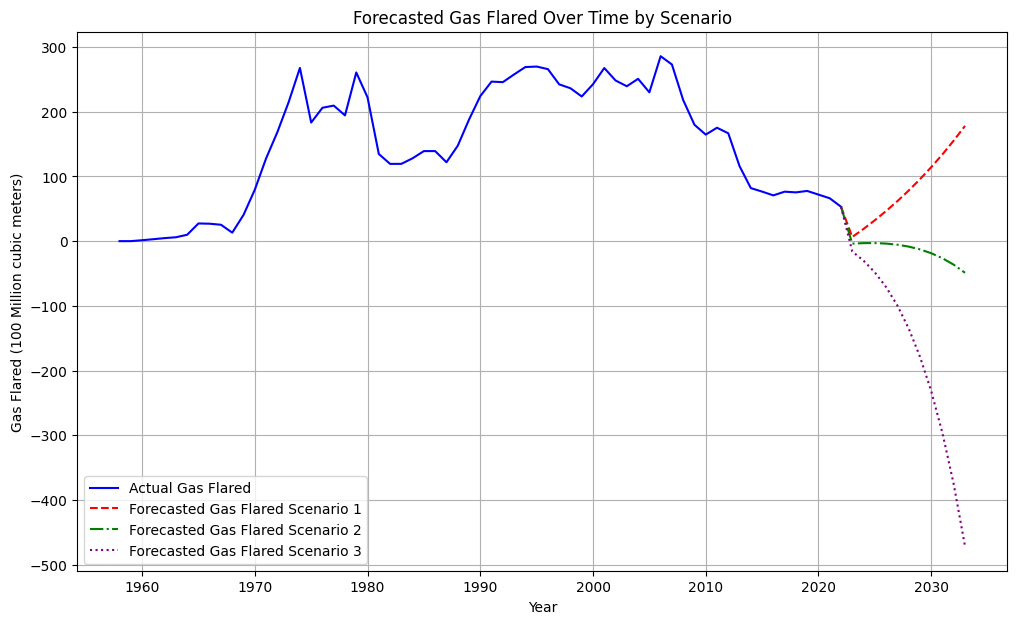

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Merge the dataframes sequentially
merged_df = pd.merge(actual_df, forecast_df, on='Year', how='outer')
merged_df = pd.merge(merged_df, forecast_df2, on='Year', how='outer', suffixes=('_s1', '_s2'))
merged_df = pd.merge(merged_df, forecast_df3, on='Year', how='outer', suffixes=('_s2', '_s3'))


# Rename the columns for clarity in the plot
merged_df.rename(columns={'Gas flared(100 Million cubic meters)': 'Actual Gas Flared',
                          'Forecasted Gas Flared (100 Million cubic meters)_s1': 'Forecasted Gas Flared Scenario 1',
                          'Forecasted Gas Flared (100 Million cubic meters)_s2': 'Forecasted Gas Flared Scenario 2',
                          'Forecasted Gas Flared (100 Million cubic meters)': 'Forecasted Gas Flared Scenario 3' # This might need adjustment based on which suffix it gets
                         }, inplace=True)

# Plotting
plt.figure(figsize=(12, 7))

# Plot actual gas flared
plt.plot(merged_df['Year'], merged_df['Actual Gas Flared'], label='Actual Gas Flared', color='blue')

# Plot forecasted gas flared for each scenario
plt.plot(merged_df['Year'], merged_df['Forecasted Gas Flared Scenario 1'], label='Forecasted Gas Flared Scenario 1', color='red', linestyle='--')
plt.plot(merged_df['Year'], merged_df['Forecasted Gas Flared Scenario 2'], label='Forecasted Gas Flared Scenario 2', color='green', linestyle='-.')
plt.plot(merged_df['Year'], merged_df['Forecasted Gas Flared Scenario 3'], label='Forecasted Gas Flared Scenario 3', color='purple', linestyle=':')


plt.xlabel('Year')
plt.ylabel('Gas Flared (100 Million cubic meters)')
plt.title('Forecasted Gas Flared Over Time by Scenario')
plt.legend()
plt.grid(True)
plt.show()

Forecast Association

In [39]:
# Forecast Association
# %%
# Make sure to use the lists populated in the loop for all projected features
forecast_df = pd.DataFrame({
    'Year': future_years,
    'Projected Gas Produced (100 Million cubic meters)': projected_gas_produced_list, # Use the list
    'Projected Oil Production (100 Million Barrels)': projected_oil_production_list, # Use the list
    'Forecasted Gas Flared (100 Million cubic meters)': forecasted_flared_gas.flatten() # This is already a flattened array of the correct length
})

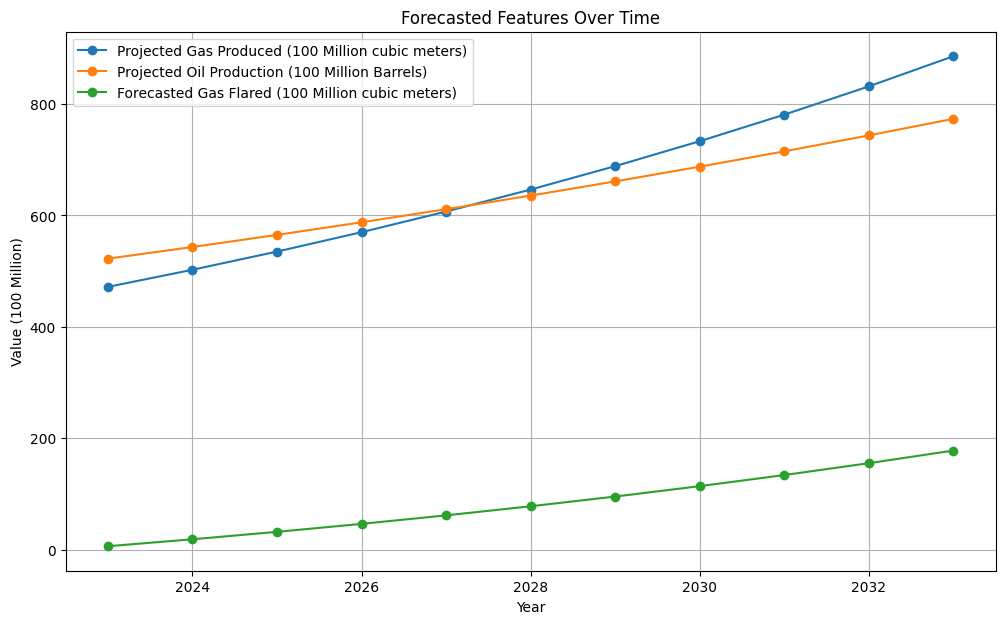

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting the features from forecast_df against the 'Year'
plt.figure(figsize=(12, 7))

# Plot each feature column against the 'Year'
for col in forecast_df.columns:
    if col != 'Year': # Avoid plotting 'Year' against itself
        plt.plot(forecast_df['Year'], forecast_df[col], marker='o', linestyle='-', label=col)

plt.xlabel('Year')
plt.ylabel('Value (100 Million)') # Assuming the units are consistent across features
plt.title('Forecasted Features Over Time')
plt.legend()
plt.grid(True)
plt.show()

Senerio Success (Recomendation)

# Function for Prediction

In [41]:
import pandas as pd

def predict_gas_flared(new_data, trained_model):
  """
  Predicts the gas flared volume using a trained linear regression model.

  Args:
    new_data: A pandas DataFrame containing the new data with the same columns
              as the training features.
    trained_model: The trained scikit-learn LinearRegression model.

  Returns:
    A numpy array containing the predicted gas flared volumes.
  """
  # Ensure the new data has the same columns as the training data
  # This is important to avoid errors during prediction
  expected_columns = ['Year', 'Gas Produced(100 Million cubic meters)','Oil production (100 Million Barrels)','Cost (USD per 100 Billion cubic meters)', 'Gas Flare penalty ($ per 1000 cubic meter)', 'No. of active Rigs', 'AVERAGE Crude price($) (BARREL)']
  if list(new_data.columns) != expected_columns:
      print("Warning: New data columns do not match training data columns.")
      print("Expected columns:", expected_columns)
      print("Given columns:", list(new_data.columns))
      # You might want to handle this error more robustly, e.g., raise an exception
      return None

  # Make predictions using the trained model
  predictions = trained_model.predict(new_data)

  return predictions

# Example usage (assuming 'model' is your trained LinearRegression model
# and you have a new DataFrame 'new_data_df'):

# Create a sample new data DataFrame (replace with your actual new data)
new_data_df = pd.DataFrame({
   'Year': [2024],
    'Gas Produced(100 Million cubic meters)': [1000],
    'Oil production (100 Million Barrels)': [200],
   'Cost (USD per 100 Billion cubic meters)': [5000],
   'Gas Flare penalty ($ per 1000 cubic meter)': [10],
     'No. of active Rigs': [50],
     'AVERAGE Crude price($) (BARREL)': [80]
 })

# # Get predictions
predicted_flared_gas = predict_gas_flared(new_data_df, model)

# # Print the predictions
print("\nPredicted Gas Flared:")
print(predicted_flared_gas)


Predicted Gas Flared:
[[-237.21029316]]


# Save Your Trained Model

In [42]:
import pickle
# Assuming 'model' is your trained linear regression model
filename = 'linear_regression_model.pkl'
pickle.dump(model, open(filename, 'wb'))